# Вариант 11
# Набор данных 2
# Модели 1, 2

Описансие набора данных

dateCrawled — когда объявление было впервые обработано парсером (все данные актуальны на эту дату).

name — "название" автомобиля.

seller — частное лицо или дилер.

offerType — тип предложения.

price — цена в объявлении.

abtest — A/B-тестирование.

vehicleType — тип транспортного средства.

yearOfRegistration — год первой регистрации автомобиля.

gearbox — тип коробки передач.

powerPS — мощность автомобиля в лошадиных силах (PS).

model — модель.

kilometer — пробег в километрах.

monthOfRegistration — месяц первой регистрации.

fuelType — тип топлива.

brand — марка автомобиля.

notRepairedDamage — наличие не устраненных повреждений.

dateCreated — дата создания объявления на eBay.

nrOfPictures — количество фотографий в объявлении (к сожалению, в этом поле везде стоит 0, что делает его бесполезным из-за ошибки в парсере).

postalCode — почтовый индекс.

lastSeenOnline — когда парсер в последний раз видел это объявление онлайн.

Целевая колонка - price

In [63]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv("autos.csv", encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113808 entries, 0 to 113807
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          113808 non-null  object 
 1   name                 113808 non-null  object 
 2   seller               113807 non-null  object 
 3   offerType            113807 non-null  object 
 4   price                113807 non-null  float64
 5   abtest               113807 non-null  object 
 6   vehicleType          102321 non-null  object 
 7   yearOfRegistration   113807 non-null  float64
 8   gearbox              107670 non-null  object 
 9   powerPS              113807 non-null  float64
 10  model                107559 non-null  object 
 11  kilometer            113807 non-null  float64
 12  monthOfRegistration  113807 non-null  float64
 13  fuelType             103519 non-null  object 
 14  brand                113807 non-null  object 
 15  notRepairedDamage

Удаление дубликатов

In [65]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113808 entries, 0 to 113807
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          113808 non-null  object 
 1   name                 113808 non-null  object 
 2   seller               113807 non-null  object 
 3   offerType            113807 non-null  object 
 4   price                113807 non-null  float64
 5   abtest               113807 non-null  object 
 6   vehicleType          102321 non-null  object 
 7   yearOfRegistration   113807 non-null  float64
 8   gearbox              107670 non-null  object 
 9   powerPS              113807 non-null  float64
 10  model                107559 non-null  object 
 11  kilometer            113807 non-null  float64
 12  monthOfRegistration  113807 non-null  float64
 13  fuelType             103519 non-null  object 
 14  brand                113807 non-null  object 
 15  notRepairedDamage

Удаление выбросов

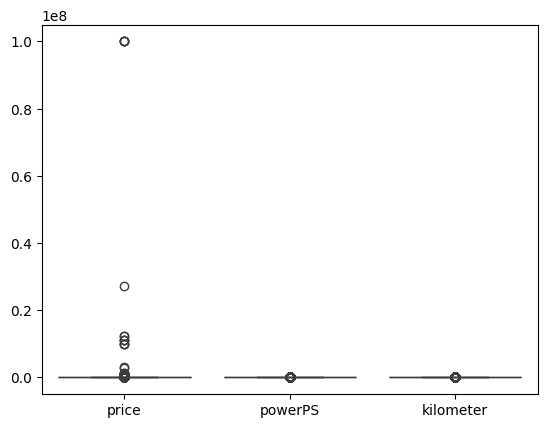

In [66]:
sns.boxplot(data=df[['price', 'powerPS', 'kilometer']])
plt.show()

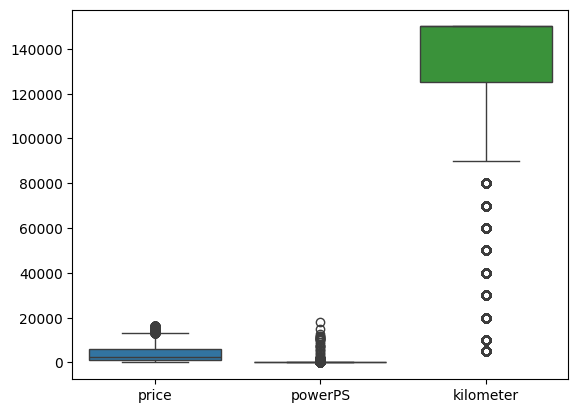

In [67]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['price'] >= Q1 - 1.5 * IQR) & (df['price'] <= Q3 + 1.5 * IQR)]

sns.boxplot(data=df[['price', 'powerPS', 'kilometer']])
plt.show()

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105079 entries, 0 to 113806
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          105079 non-null  object 
 1   name                 105079 non-null  object 
 2   seller               105079 non-null  object 
 3   offerType            105079 non-null  object 
 4   price                105079 non-null  float64
 5   abtest               105079 non-null  object 
 6   vehicleType          93803 non-null   object 
 7   yearOfRegistration   105079 non-null  float64
 8   gearbox              99106 non-null   object 
 9   powerPS              105079 non-null  float64
 10  model                99179 non-null   object 
 11  kilometer            105079 non-null  float64
 12  monthOfRegistration  105079 non-null  float64
 13  fuelType             95046 non-null   object 
 14  brand                105079 non-null  object 
 15  notRepairedDamage    8

Матрица корреляции

<Axes: >

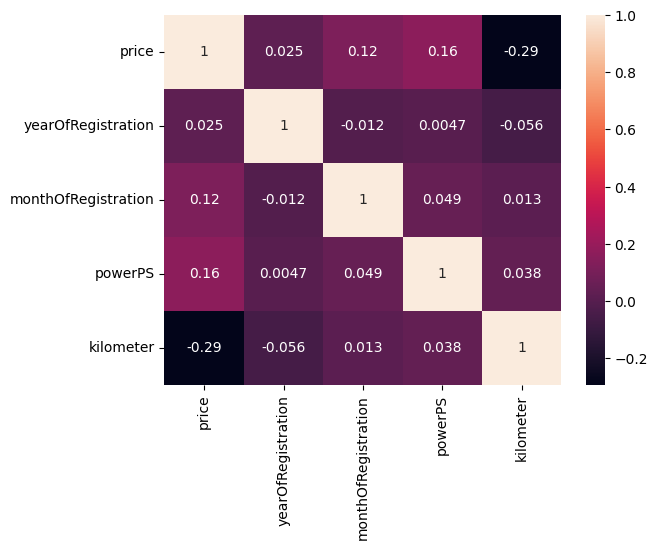

In [69]:
corr = df[['price', 'yearOfRegistration', 'monthOfRegistration', 'powerPS', 'kilometer']].corr()
sns.heatmap(corr, annot=True)

Никаких сильно коррелирующих признаков не видно

Анализ пропусков

In [70]:
print(df.isnull().sum())

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            11276
yearOfRegistration         0
gearbox                 5973
powerPS                    0
model                   5900
kilometer                  0
monthOfRegistration        0
fuelType               10033
brand                      0
notRepairedDamage      21640
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64


vehicleType, gearbox, model, fuelType - имеют пропуски скорее всего из-за того что продавец не указал эти данные

notRepairedDamage - скорее всего имеет пропуски, потому что у машин на продаже нет неустраненных повреждений

Удаление стобцов и заполнение пропусков

In [71]:
df = df.drop(['nrOfPictures', 'dateCrawled', 'lastSeen'], axis=1)  # Бесполезные признаки

Масштабирование числовых признаков

<Axes: >

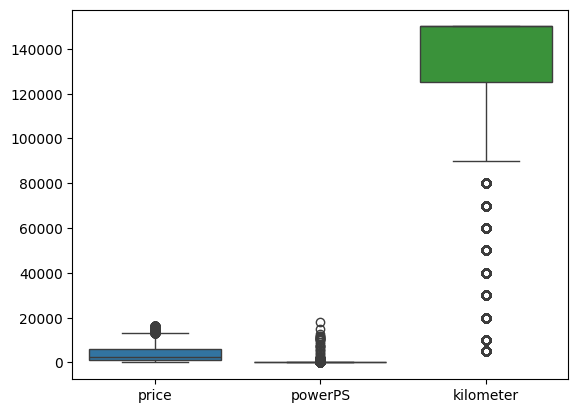

In [72]:
sns.boxplot(data=df[['price', 'powerPS', 'kilometer']])

Так как данные не нормализованы буду использовать

In [73]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['powerPS', 'kilometer']] = scaler.fit_transform(df[['powerPS', 'kilometer']])

<Axes: >

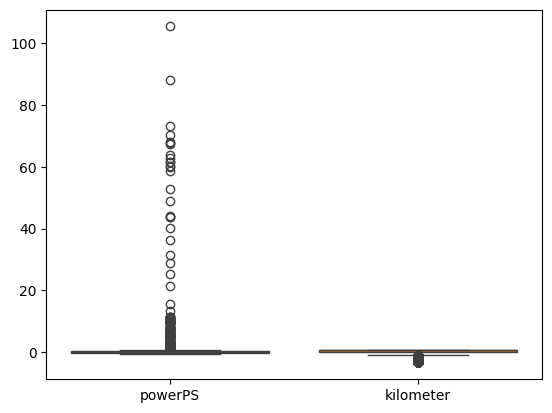

In [74]:
sns.boxplot(data=df[['powerPS', 'kilometer']])

Замена категориальных признаков

Буду использовать LabelEncoder потому что много уникальных значений

In [75]:
from sklearn.preprocessing import LabelEncoder

object_cols = df.select_dtypes(include=['object']).columns

for col in object_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

Решение задачи регрессии

In [76]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Без регуляризаторов

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(mse)

11834119.551876219


LASSO регуляризатор

In [78]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
grid_search.fit(X_train, y_train)

best_lasso = grid_search.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(mse_lasso)

11834388.757805344


refit=True - модель сама переобучится после подбора лучших параметров

метрика neg_mean_squared_error - сильнее штрафует за большие ошибки

Корреляция

In [79]:
from scipy.stats import pearsonr, spearmanr

# Пирсон
pearson_corr, pearson_p = pearsonr(y_test, y_pred)
print("Пирсон:", pearson_corr, pearson_p)
# Спирмен
spearman_corr, spearman_p = spearmanr(y_test, y_pred)
print("Спирмен:", spearman_corr, spearman_p)

Пирсон: 0.44600834536184975 0.0
Спирмен: 0.46237427115355023 0.0


Значение p-value = 0, а значит статистическая связь значима